In [ ]:
%pip install "zenml[server]"
! zenml integration install sklearn -y
%pip install pyparsing==2.4.2

import IPython
IPython.Application.instance().kernel.do_shutdown(restart=True)

⠹ Installing integrations...


{'status': 'ok', 'restart': True}

In [ ]:
NGROK_TOKEN='2rOijZwbnmMlb0DtShfkxCYV16d_2GCzpCTYEtoEa4Zu6shsX'

In [ ]:
from zenml.environment import Environment

In [ ]:
if Environment.in_google_colab():
  !pip install pyngrok
  !ngrok authtoken 2rOijZwbnmMlb0DtShfkxCYV16d_2GCzpCTYEtoEa4Zu6shsX

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
! rm -rf .zen
! zenml init

⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
ZenML repository initialized at /content.
⠧ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.

The local active stack was initialized to 'default'. This local configuration will only take effect 
when you're running ZenML from the initialized repository root, or from a subdirectory. For more 
information on repositories and configurations, please visit 
https://docs.zenml.io/user-guide/production-guide/understand-stacks.


In [ ]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
@step
def importer()-> Tuple[
    Annotated[np.ndarray,"X_train"],
    Annotated[np.ndarray,"X_test"],
    Annotated[np.ndarray,"y_train"],
    Annotated[np.ndarray,"y_test"],
]:
   digits=load_digits()
   data=digits.images.reshape((len(digits.images),-1))
   X_train,X_test,y_train,y_test=train_test_split(
       data,digits.target,test_size=0.2,shuffle=False
   )
   return X_train,X_test,y_train,y_test

@step
def svc_trainer (
      X_train:np.ndarray,
      y_train:np.ndarray,
  )->ClassifierMixin:
     model=SVC(gamma=0.001)
     model.fit(X_train,y_train)
     return model

@step
def evaluator(
    X_test:np.ndarray,
    y_test:np.ndarray,
    model:ClassifierMixin,
)-> float:
    test_acc=model.score(X_test,y_test)
    print("Test accuracy:")
    print(test_acc)
    return test_acc


In [ ]:
from zenml import pipeline
@pipeline
def digits_pipeline():
  X_train,X_test,y_train,y_test=importer()
  model=svc_trainer(X_train=X_train,y_train=y_train)
  evaluator(X_test=X_test,y_test=y_test,model=model)

In [ ]:
digits_svc_pipeline=digits_pipeline()

Initiating a new run for the pipeline: digits_pipeline.
Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Using cached version of step importer.
Using cached version of step svc_trainer.
Step evaluator has started.
Test accuracy:
0.9583333333333334
Step evaluator has finished in 0.360s.
Pipeline run has finished in 0.505s.


In [ ]:
from zenml.environment import Environment
def start_zenml_dashboard(port=8237):
    if Environment.in_google_colab():
        from pyngrok import ngrok
        public_url = ngrok.connect(port)
        print(public_url)
        !zenml up --blocking --port {port}
    else:
        !zenml up --port {port}
start_zenml_dashboard()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import fetch_california_housing
boston=fetch_california_housing()


In [4]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df["MedInc"]=boston.target

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [13]:
df.corr() # pearson corelation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967
HouseAge,0.105623,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.151948,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.046701,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,-0.024650,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,-0.023737,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.144160,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.045967,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


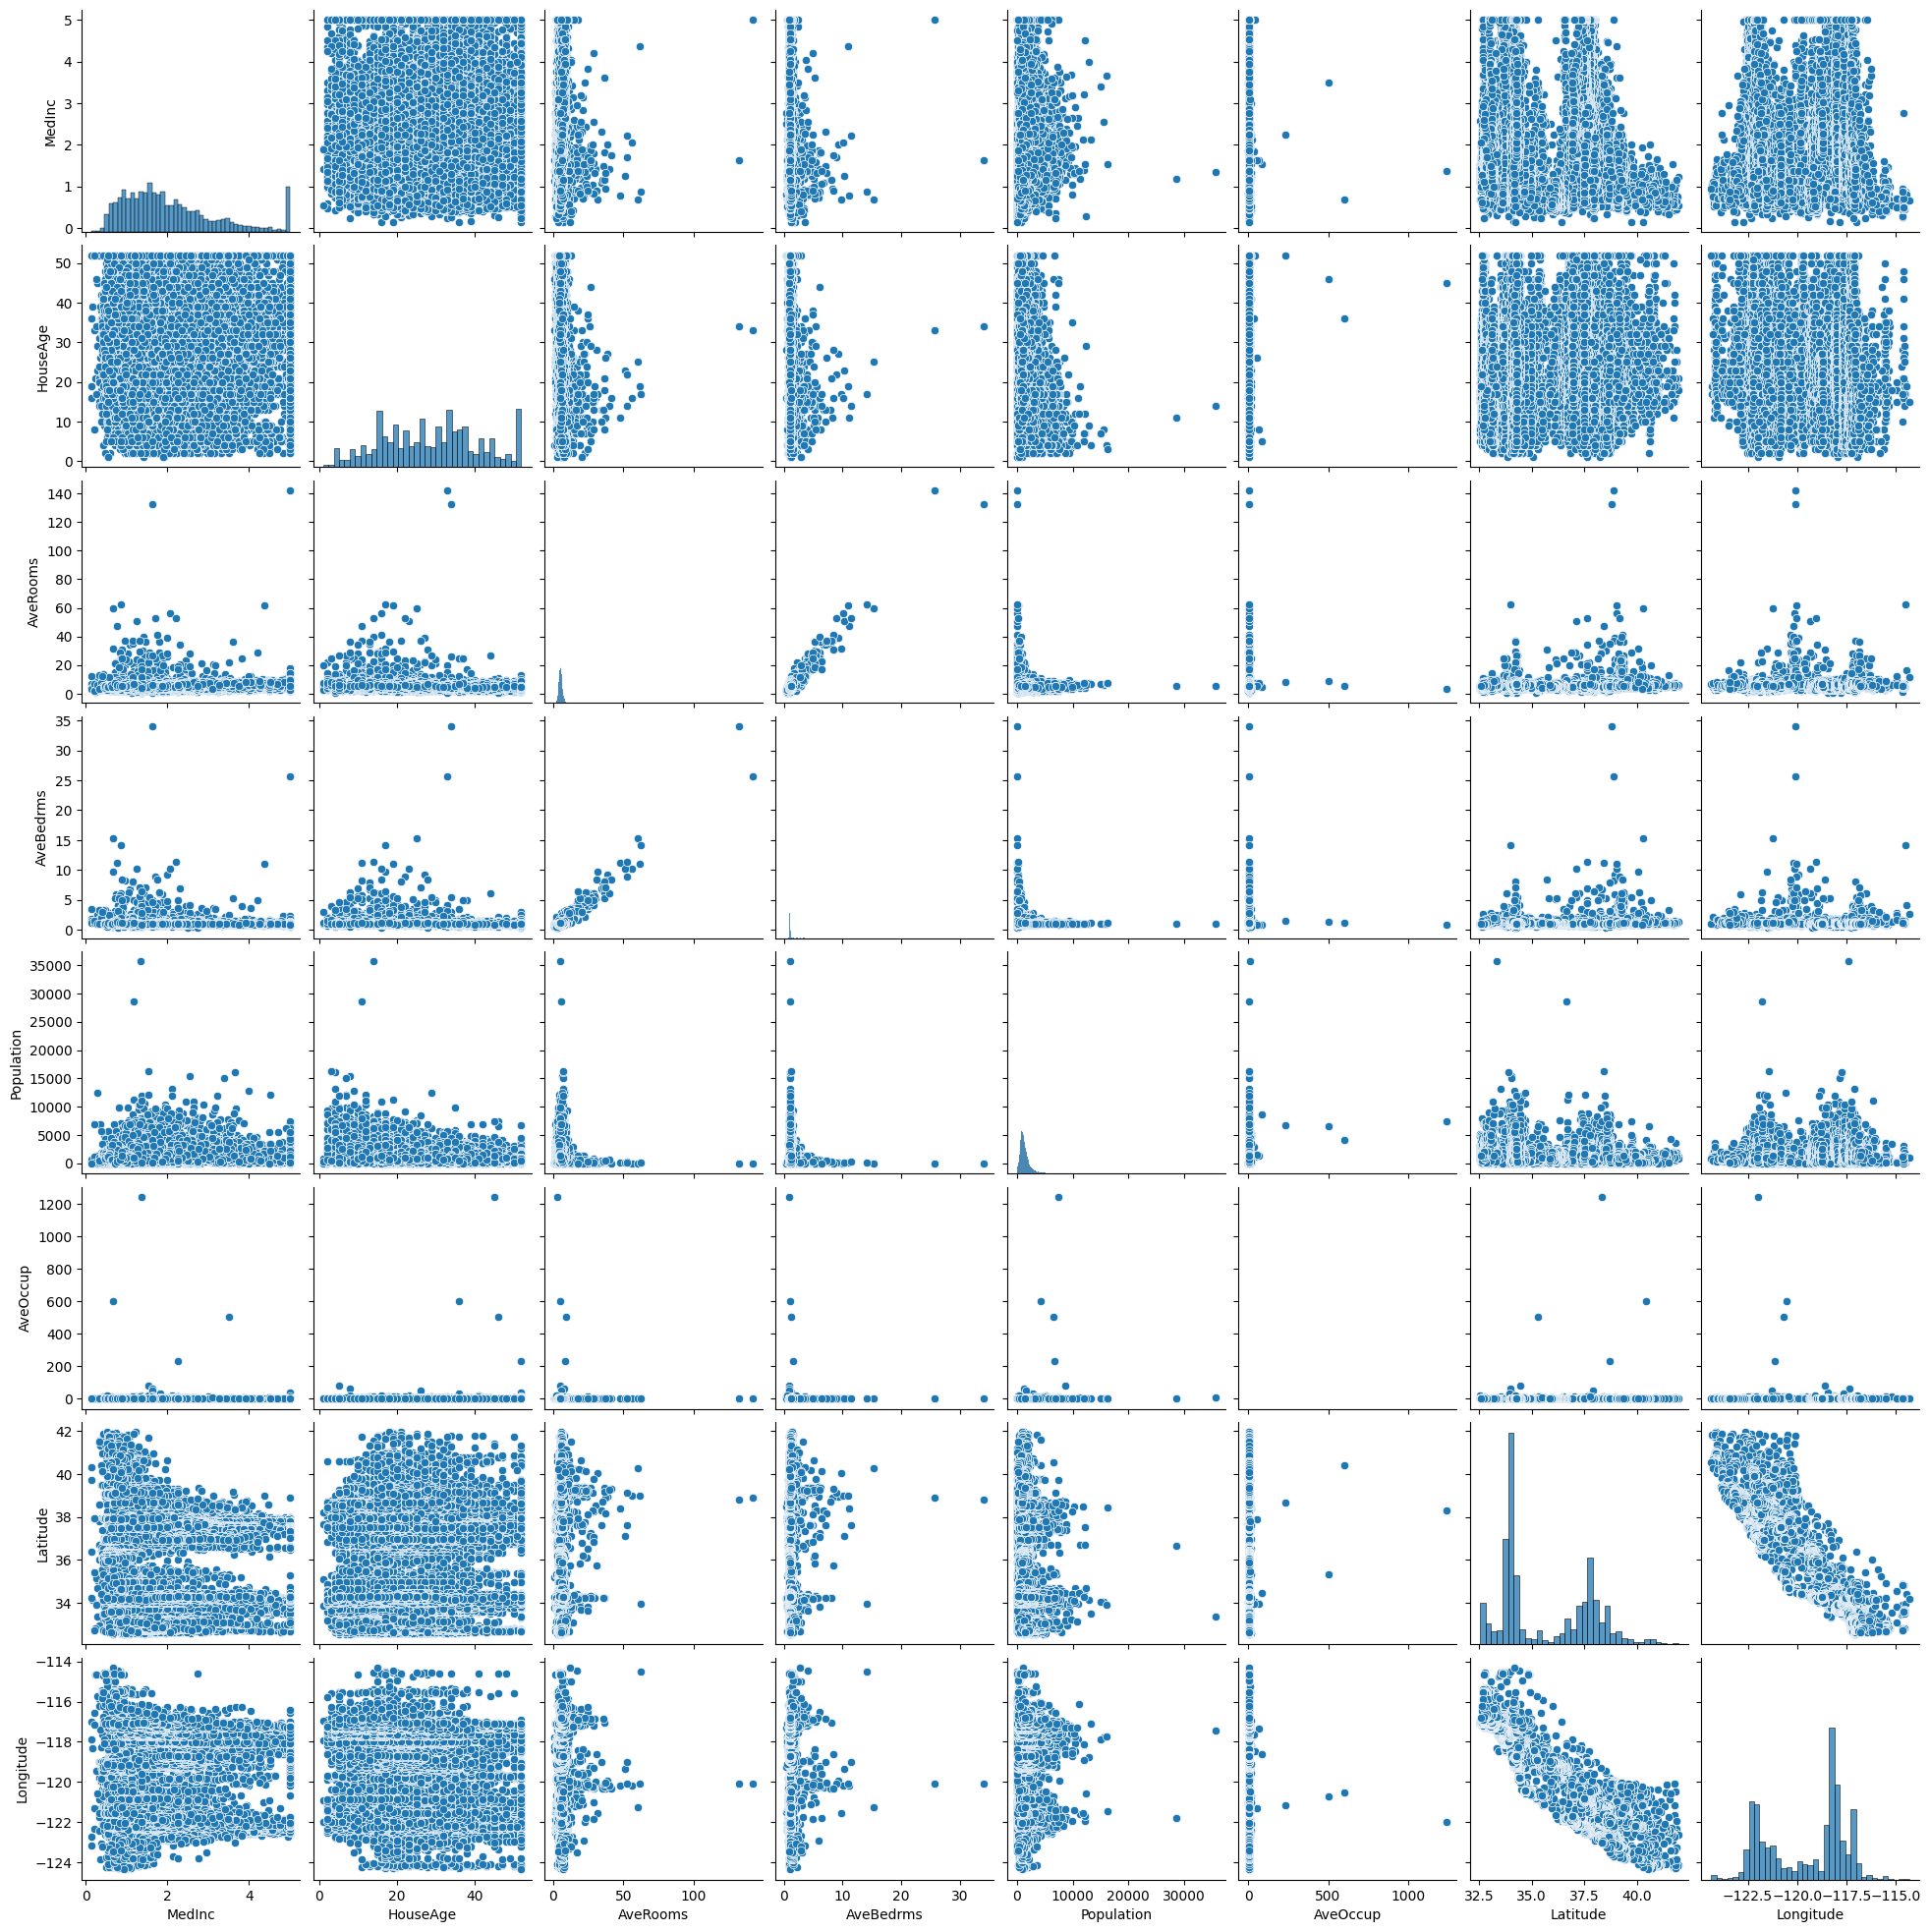

In [14]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'MedInc')

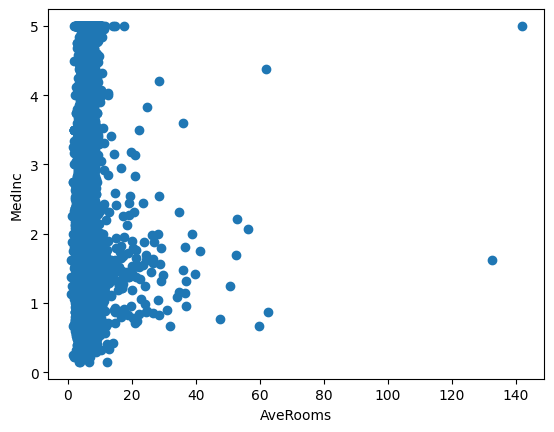

In [15]:
plt.scatter(df['AveRooms'],df['MedInc'])
plt.xlabel('AveRooms')
plt.ylabel('MedInc')

<Axes: xlabel='AveRooms', ylabel='MedInc'>

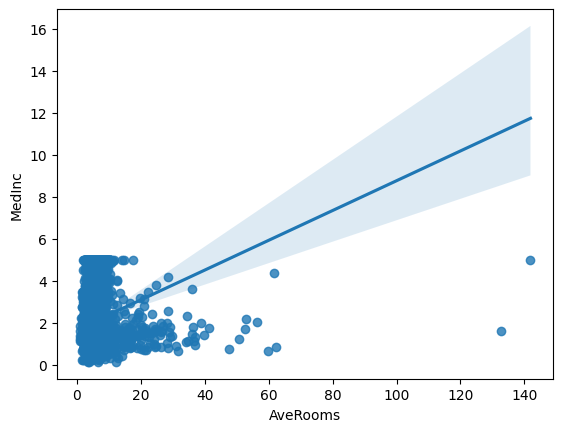

In [16]:
import seaborn as sns
sns.regplot(x="AveRooms",y="MedInc",data=df)

In [17]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [18]:
X

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
y

,MedInc
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
print(model.coef_)

[ 0.05734914  0.84834719 -0.63188496 -0.01585364 -0.01528796 -1.54176306
 -1.43842018]


In [24]:
print(model.intercept_)

2.0692396089424174


In [25]:
prediction=model.predict(X_test)

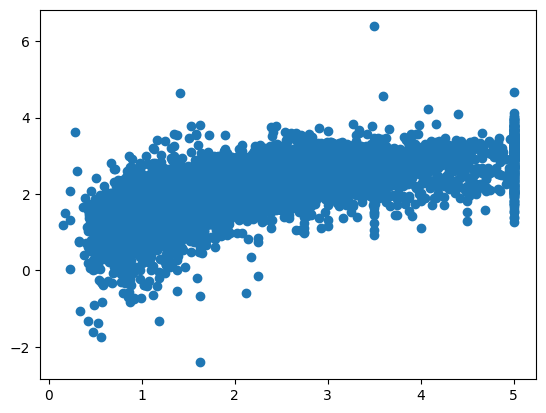

In [26]:
plt.scatter(y_test,prediction)

In [27]:
error=y_test-prediction

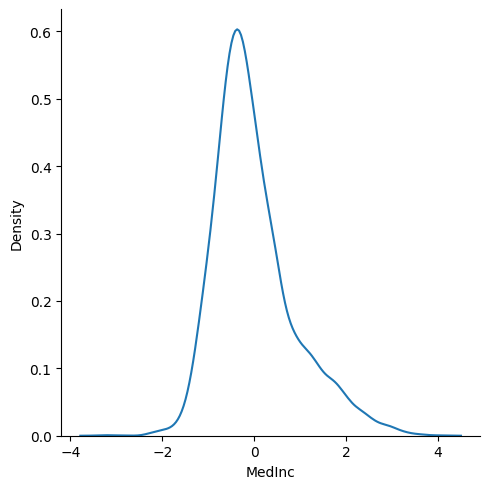

In [80]:
sns.displot(error,kind="kde")

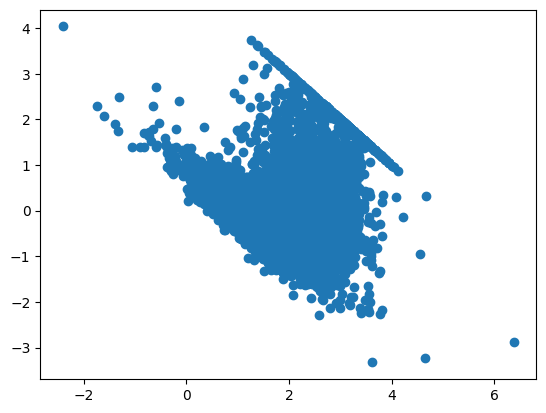

In [82]:
plt.scatter(prediction,error)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))


0.6713261610064607
0.771418205164613
0.8783041643784988


In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))

0.4122707560918123


In [31]:
boston.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [33]:
scaler.transform(boston.data[0,1:].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.98504972,  0.63012521, -0.16586931, -0.96995366, -0.04555657,
         1.04385626, -1.32105914]])

In [34]:
model.predict(boston.data[0,1:].reshape(1,-1))

array([121.97076316])

In [36]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))